In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
df_rocs = pd.read_csv('../data/cuts_roc_efficiency.csv')
df_rocs.head()

filename            eta_range  \
0    cuts_files/Eta0Pt1Mu1ConvertedMC15.root  0.00 < |eta| < 0.60   
1  cuts_files/Eta0Pt1Mu1UnconvertedMC15.root  0.00 < |eta| < 0.60   
2    cuts_files/Eta0Pt2Mu1ConvertedMC15.root  0.00 < |eta| < 0.60   
3  cuts_files/Eta0Pt2Mu1UnconvertedMC15.root  0.00 < |eta| < 0.60   
4  cuts_files/Eta1Pt1Mu1UnconvertedMC15.root  0.60 < |eta| < 0.80   

       pt_range  nominal_auc  topo_auc  nominal_roi  topo_roi  eta_bin pt_bin  \
0  25 < pt < 30       86.316    86.942        8.754     8.846        0      1   
1  25 < pt < 30       85.908    86.109        8.964     8.979        0      1   
2  30 < pt < 40       88.706    89.270        9.155     9.259        0      2   
3  30 < pt < 40       87.907    87.921        9.260     9.290        0      2   
4  25 < pt < 30       84.867    85.049        8.686     8.758        1      1   

    conversion   wp  nominal_bkg_rej  topo_bkg_rej  sig_events  bkg_events  
0    Converted  0.9            0.760         0.768        6866        8827  
1  Unconverted  0.9            0.776         0.776       27026       19432  
2    Converted  0.9            0.803         0.812       28791       13788  
3  Unconverted  0.9            0.805         0.807      108854       23894  
4  Unconverted  0.9            0.745         0.748        9195        7516

In [3]:
df_rocs['dRej'] = 100*(df_rocs['topo_bkg_rej'] - df_rocs['nominal_bkg_rej'])

In [4]:
plottable_df = df_rocs[df_rocs.conversion == 'Unconverted']
plottable_df = plottable_df[plottable_df.pt_range != 'inclusive']

#plottable_df = plottable_df[['filename','eta_bin','pt_bin','dRej']]
plottable_df

filename            eta_range  \
1    cuts_files/Eta0Pt1Mu1UnconvertedMC15.root  0.00 < |eta| < 0.60   
3    cuts_files/Eta0Pt2Mu1UnconvertedMC15.root  0.00 < |eta| < 0.60   
4    cuts_files/Eta1Pt1Mu1UnconvertedMC15.root  0.60 < |eta| < 0.80   
5   cuts_files/Eta1Pt11Mu1UnconvertedMC15.root  0.60 < |eta| < 0.80   
7   cuts_files/Eta1Pt10Mu1UnconvertedMC15.root  0.60 < |eta| < 0.80   
11   cuts_files/Eta1Pt2Mu1UnconvertedMC15.root  0.60 < |eta| < 0.80   
13   cuts_files/Eta1Pt3Mu1UnconvertedMC15.root  0.60 < |eta| < 0.80   
15   cuts_files/Eta1Pt7Mu1UnconvertedMC15.root  0.60 < |eta| < 0.80   
17   cuts_files/Eta1Pt8Mu1UnconvertedMC15.root  0.60 < |eta| < 0.80   
19   cuts_files/Eta1Pt9Mu1UnconvertedMC15.root  0.60 < |eta| < 0.80   
22   cuts_files/Eta2Pt1Mu1UnconvertedMC15.root  0.80 < |eta| < 1.15   
23   cuts_files/Eta2Pt2Mu1UnconvertedMC15.root  0.80 < |eta| < 1.15   
26   cuts_files/Eta2Pt3Mu1UnconvertedMC15.root  0.80 < |eta| < 1.15   
27   cuts_files/Eta3Pt1Mu1UnconvertedMC15.root  1.15 < |eta| < 1.37   
30   cuts_files/Eta3Pt2Mu1UnconvertedMC15.root  1.15 < |eta| < 1.37   
31   cuts_files/Eta3Pt3Mu1UnconvertedMC15.root  1.15 < |eta| < 1.37   
34   cuts_files/Eta5Pt1Mu1UnconvertedMC15.root  1.52 < |eta| < 1.81   
35   cuts_files/Eta5Pt2Mu1UnconvertedMC15.root  1.52 < |eta| < 1.81   
36   cuts_files/Eta5Pt3Mu1UnconvertedMC15.root  1.52 < |eta| < 1.81   
39   cuts_files/Eta6Pt1Mu1UnconvertedMC15.root  1.81 < |eta| < 2.01   
40   cuts_files/Eta6Pt3Mu1UnconvertedMC15.root  1.81 < |eta| < 2.01   
42   cuts_files/Eta6Pt4Mu1UnconvertedMC15.root  1.81 < |eta| < 2.01   
43   cuts_files/Eta7Pt1Mu1UnconvertedMC15.root  2.01 < |eta| < 2.37   
45   cuts_files/Eta7Pt3Mu1UnconvertedMC15.root  2.01 < |eta| < 2.37   

          pt_range  nominal_auc  topo_auc  nominal_roi  topo_roi  eta_bin  \
1     25 < pt < 30       85.908    86.109        8.964     8.979        0   
3     30 < pt < 40       87.907    87.921        9.260     9.290        0   
4     25 < pt < 30       84.867    85.049        8.686     8.758        1   
5   250 < pt < 500       93.000    93.000       11.000    11.000        1   
7   175 < pt < 250       92.906    92.893       10.959    10.957        1   
11    30 < pt < 40       86.150    86.556        8.871     9.000        1   
13    40 < pt < 50       88.350    88.501        9.257     9.325        1   
15  100 < pt < 125       92.626    92.105       10.330    10.422        1   
17  125 < pt < 150       92.566    92.127       10.503    10.579        1   
19  150 < pt < 175       93.393    93.235       10.732    10.737        1   
22    25 < pt < 30       81.887    81.600        8.026     7.475        2   
23    30 < pt < 40       84.185    84.666        8.536     8.676        2   
26    40 < pt < 50       86.454    86.892        8.865     8.995        2   
27    25 < pt < 30       83.186    84.276        8.079     8.402        3   
30    30 < pt < 40       85.308    86.166        8.501     8.662        3   
31    40 < pt < 50       86.581    86.232        8.699     8.875        3   
34    25 < pt < 30       84.769    85.162        8.145     8.348        4   
35    30 < pt < 40       86.324    86.110        8.399     8.584        4   
36    40 < pt < 50       87.175    88.042        8.455     8.667        4   
39    25 < pt < 30       86.295    87.362        8.376     8.630        5   
40    40 < pt < 50       88.222    88.380        8.911     9.149        5   
42    50 < pt < 60       90.556    91.089        9.448     9.553        5   
43    25 < pt < 30       85.656    86.063        8.060     8.189        6   
45    40 < pt < 50       87.011    86.658        8.526     8.575        6   

   pt_bin   conversion   wp  nominal_bkg_rej  topo_bkg_rej  sig_events  \
1       1  Unconverted  0.9            0.776         0.776       27026   
3       2  Unconverted  0.9            0.805         0.807      108854   
4       1  Unconverted  0.9            0.745         0.748        9195   
5      11  Unconverted  0.9            1

In [5]:
plottable_df.pivot('pt_bin','eta_bin','dRej').values
signal_events_matrix = plottable_df.pivot('pt_bin','eta_bin','sig_events').values
background_events_matrix = plottable_df.pivot('pt_bin','eta_bin','bkg_events').values


In [6]:
p_data = plottable_df.pivot('pt_bin','eta_bin','dRej').values
mask = np.logical_or(np.isnan(p_data), np.where(np.nan_to_num(signal_events_matrix,0) < 500,True,False))
mask = np.logical_or(mask, np.where(np.nan_to_num(background_events_matrix,0) < 500,True,False))

eta_labels=[
    '$0 < |\eta| < 0.6$',
    '$0.6 <|\eta| < 0.8$',
    '$0.8 < |\eta|< 1.15$',
    '$1.15 < |\eta|< 1.37$',
    '$1.52 < |\eta|< 1.81$',
    '$1.81 < |\eta|< 2.01$',
    '$2.01 < |\eta| < 2.37$',
]
pt_labels=[
    '$25 < p_{T} < 30 $',
    '$30 < p_{T} < 40 $',
    '$40 < p_{T} < 50 $',
    '$50 < p_{T} < 60 $',
    '$60 < p_{T} < 80 $',
    '$80 < p_{T} < 100 $',
    '$100 < p_{T} < 125 $',
    '$125 < p_{T} < 150 $',
    '$150 < p_{T} < 175 $',
    '$175 < p_{T} < 250 $',
    '$250 < p_{T} < 500 $',
    '$500 < p_{T} < 1500 $',
]

In [15]:
p_data

array([[  0. ,   0.3, -65.2,   2.1,   1.6,   1.6,   0.3],
       [  nan,   0. ,   nan,   nan,   nan,   nan,   nan],
       [  nan,   0. ,   nan,   nan,   nan,   nan,   nan],
       [  0.2,   0.9,   1. ,   0.9,   2.3,   nan,   nan],
       [  nan,   0.4,   1.1,   1.5,   1.7,   2.6,   0.7],
       [  nan,   nan,   nan,   nan,   nan,   0.8,   nan],
       [  nan,   1.4,   nan,   nan,   nan,   nan,   nan],
       [  nan,   0.9,   nan,   nan,   nan,   nan,   nan],
       [  nan,   0. ,   nan,   nan,   nan,   nan,   nan]])

[Text(0,0.5,'$25 < p_{T} < 30 $'),
 Text(0,1.5,'$30 < p_{T} < 40 $'),
 Text(0,2.5,'$40 < p_{T} < 50 $'),
 Text(0,3.5,'$50 < p_{T} < 60 $'),
 Text(0,4.5,'$60 < p_{T} < 80 $'),
 Text(0,5.5,'$80 < p_{T} < 100 $'),
 Text(0,6.5,'$100 < p_{T} < 125 $'),
 Text(0,7.5,'$125 < p_{T} < 150 $'),
 Text(0,8.5,'$150 < p_{T} < 175 $')]

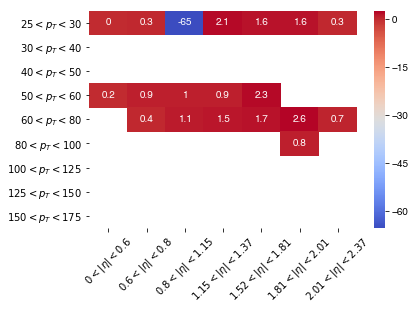

In [8]:
sns.heatmap(p_data, mask=mask, annot=True, cmap='coolwarm')
plt.gca().set_xticklabels(eta_labels,rotation=45)
plt.gca().set_yticklabels(pt_labels,rotation=0)

In [9]:
from math import sqrt
inclusive_df = df_rocs[df_rocs.conversion == 'Unconverted']
inclusive_df = inclusive_df[inclusive_df.pt_range == 'inclusive']
inclusive_df['loc_bin_eta'] = inclusive_df['eta_bin']+0.5
inclusive_df['eta_err'] = np.sqrt((inclusive_df['dRej']/100*(1-inclusive_df['dRej']/100))/inclusive_df['bkg_events'])*100
inclusive_df

filename            eta_range  \
46  cuts_files/Eta0PtInclusiveMu1UnconvertedMC15.root  0.00 < |eta| < 0.60   
49  cuts_files/Eta1PtInclusiveMu1UnconvertedMC15.root  0.60 < |eta| < 0.80   
51  cuts_files/Eta2PtInclusiveMu1UnconvertedMC15.root  0.80 < |eta| < 1.15   
53  cuts_files/Eta3PtInclusiveMu1UnconvertedMC15.root  1.15 < |eta| < 1.37   
54  cuts_files/Eta5PtInclusiveMu1UnconvertedMC15.root  1.52 < |eta| < 1.81   
56  cuts_files/Eta6PtInclusiveMu1UnconvertedMC15.root  1.81 < |eta| < 2.01   
58  cuts_files/Eta7PtInclusiveMu1UnconvertedMC15.root  2.01 < |eta| < 2.37   

     pt_range  nominal_auc  topo_auc  nominal_roi  topo_roi  eta_bin  \
46  inclusive       86.150    86.135        8.997     9.005        0   
49  inclusive       85.638    85.243        8.724     8.845        1   
51  inclusive       82.095    82.235        8.078     8.203        2   
53  inclusive       83.355    83.530        8.109     8.253        3   
54  inclusive       84.810    85.308        8.105     8.324        4   
56  inclusive       85.998    86.770        8.371     8.590        5   
58  inclusive       84.879    85.625        7.978     8.137        6   

       pt_bin   conversion   wp  nominal_bkg_rej  topo_bkg_rej  sig_events  \
46  Inclusive  Unconverted  0.9            0.778         0.779     1097905   
49  Inclusive  Unconverted  0.9            0.745         0.752      363111   
51  Inclusive  Unconverted  0.9            0.669         0.673      512768   
53  Inclusive  Unconverted  0.9            0.681         0.686      282088   
54  Inclusive  Unconverted  0.9            0.683         0.704      282733   
56  Inclusive  Unconverted  0.9            0.717         0.735      200070   
58  Inclusive  Unconverted  0.9            0.666         0.677      369953   

    bkg_events  dRej  loc_bin_eta   eta_err  
46       91819   0.1          0.5  0.010431  
49       35846   0.7          1.5  0.044036  
51       41471   0.4          2.5  0.030995  
53       25670   0.5          3.5  0.044023  
54       23088   2.1          4.5  0.094364  
56       10971   1.8          5.5  0.126931  
58       22286   1.1          6.5  0.069868

In [13]:
inclusive_df.plot(x='loc_bin_eta',y='dRej', marker='_',linestyle="None",markersize=60, figsize=(8,6), yerr='eta_err')
ax= plt.gca()
ax.set_xlim(xmin=0, xmax=7)
ax.xaxis.grid(True)
ax.set_xticklabels(eta_labels,rotation=30, fontsize=12)
ax.get_legend().remove()


hfont = {'fontname':'Helvetica'}
ax.set_ylabel('Percent change in background rejection', fontsize=16, **hfont)
ax.set_xlabel('')
ax.tick_params(axis='y', labelsize=12)

plt.annotate('$p_{T}$ Inclusive', xy=(.02,.93),xycoords='axes fraction', horizontalalignment='left',fontsize=18,  **hfont)
plt.annotate('Cuts Method', xy=(.02,.81),xycoords='axes fraction', horizontalalignment='left',fontsize=18,  **hfont)
plt.annotate('90% Signal Efficiency', xy=(.02,.75),xycoords='axes fraction', horizontalalignment='left',fontsize=18,  **hfont)
plt.annotate('Unconverted Photons', xy=(.02,.69),xycoords='axes fraction', horizontalalignment='left',fontsize=18,  **hfont)


rc('text', usetex=True)
plt.annotate(r"\textit{\textbf{ATLAS}} Internal", xy=(.02,.87),xycoords='axes fraction', horizontalalignment='left',fontsize=18,  **hfont)
rc('text', usetex=False)
plt.tight_layout()

plt.savefig('../run/cuts_improve.pdf')